In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [4]:
dataset = pd.read_csv('/content/reading1.csv')
X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, 1].values

In [5]:
regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)
regressor.fit(X, y)

RandomForestRegressor(max_depth=10, random_state=0)

In [6]:
temp_value = [[27.56]]
tds_prediction = regressor.predict(temp_value)
print(f"Predicted TDS for {temp_value[0][0]}°C: {tds_prediction[0]}")

Predicted TDS for 27.56°C: 177.6224790677219


In [7]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
y_pred_rf = regressor.predict(X)
mae = mean_absolute_error(y, y_pred_rf)
mse = mean_squared_error(y, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred_rf)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Model Accuracy (R² Score): {r2:.4f}")


Mean Absolute Error (MAE): 1.5202
Mean Squared Error (MSE): 3.7508
Root Mean Squared Error (RMSE): 1.9367
Model Accuracy (R² Score): 0.0423


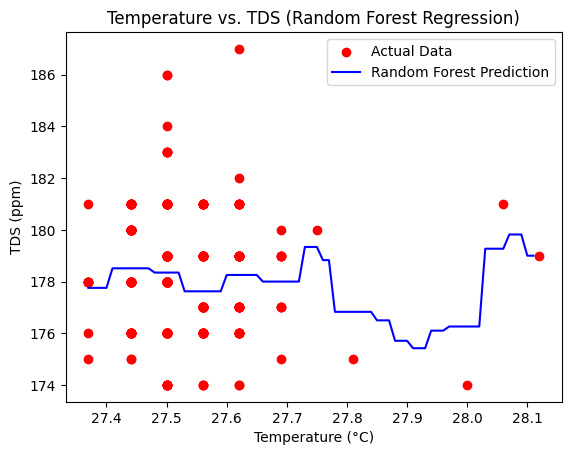

In [8]:
X_grid = np.arange(X.min(), X.max(), 0.01).reshape(-1, 1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(X_grid, regressor.predict(X_grid), color='blue', label='Random Forest Prediction')
plt.title('Temperature vs. TDS (Random Forest Regression)')
plt.xlabel('Temperature (°C)')
plt.ylabel('TDS (ppm)')
plt.legend()
plt.show()